# Project 9 -Partial Correlations and Directed Acyclic Graphs
## Generating artificial data 

In [1]:
import random
import numpy as np
import pandas as pd

length = 100000
cols = ["P", "Q", "X", "Y", "Z"]
mu = 0
sigma = 5


lst_dct = {col:[] for col in cols}
for i in range(length):
    lst_dct["P"].append(25 + np.random.normal(mu, .5 * sigma))
    lst_dct["Q"].append(50 + np.random.normal(mu, sigma))
    lst_dct["X"].append(3 * lst_dct["Q"][-1]  + np.random.normal(mu, sigma ))
    lst_dct["Y"].append(lst_dct["Q"][-1] * -1 +  np.random.normal(mu, sigma))
    lst_dct["Z"].append(
        lst_dct["P"][-1] * 2 +  1.5 * lst_dct["X"][-1] -  lst_dct["Y"][-1] * 2 +  np.random.normal(mu,  sigma))

lst_dct

{'P': [26.57366804574243,
  25.696757395040443,
  25.598722251990505,
  21.782901908364536,
  23.700291565099374,
  25.368908751792134,
  26.632898446771076,
  24.457441909208022,
  22.46100512676892,
  27.854748966948293,
  23.91775670470835,
  25.056778677639063,
  24.043920055428476,
  21.374855266625584,
  31.219136047128412,
  25.848726754509205,
  27.145124362253107,
  20.479234530337152,
  23.714404178634243,
  25.457872802487493,
  26.8531063271589,
  23.683656553745443,
  20.671593816127423,
  30.77157326522272,
  22.20396164483216,
  22.411531878272985,
  24.714309499705607,
  26.41470016271675,
  26.646135499450708,
  23.066734308958885,
  26.055397259046245,
  25.97456966091532,
  30.364150168435383,
  25.78684115672306,
  27.920415297706068,
  24.07354738590469,
  27.06532905969563,
  30.59429617092088,
  26.326607371557127,
  21.820257642858895,
  25.264958959059722,
  28.03096431022403,
  28.887715991755783,
  23.460821920137818,
  27.116927342548884,
  26.38954507479734

In [2]:
df = pd.DataFrame(lst_dct)
df

,P,Q,X,Y,Z
0,26.573668,47.187038,147.327731,-37.392609,350.178883
1,25.696757,52.151230,163.048316,-50.506714,395.888730
2,25.598722,50.085184,141.826353,-57.416655,381.990296
3,21.782902,46.015846,136.314937,-57.939109,359.784949
4,23.700292,49.475451,142.895722,-44.267403,353.768100
...,...,...,...,...,...
99995,23.150478,50.452164,146.863743,-47.548845,360.040156
99996,22.960750,42.081151,126.902991,-42.853720,319.955717
99997,26.054204,55.141155,173.328760,-52.958368,422.335222
99998,28.297064,44.052315,131.057739,-44.759666,347.842882


<AxesSubplot:xlabel='X', ylabel='Z'>

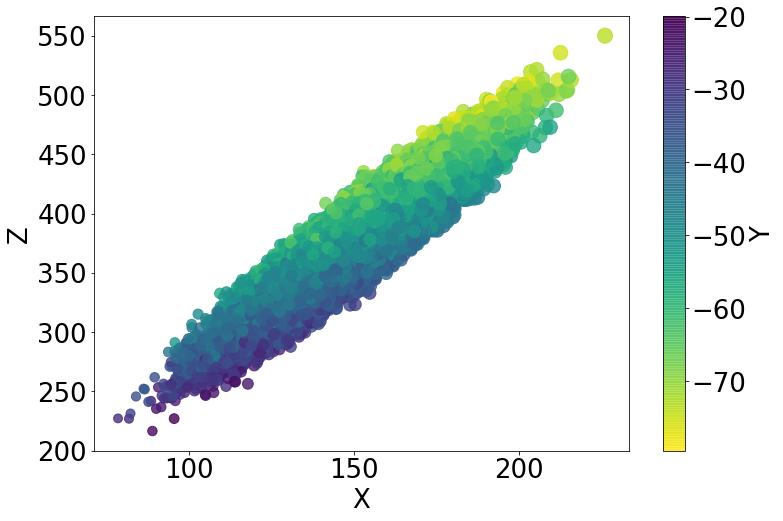

In [3]:
import matplotlib.pyplot as plt
# We can visualize the correlation of these variables on four dimensions:
#     2 dimensions in x-y space, a 3rd dimension using size and a fourth using color
plt.rcParams.update({"font.size":26})
fig, ax = plt.subplots(figsize = (12,8))
df.plot.scatter(x = "X", y = "Z", c = "Y",s = "X", cmap = "viridis_r",alpha = .8, ax = ax)

In [4]:
df.corr()

,P,Q,X,Y,Z
P,1.000000,-0.004548,-0.003538,0.001671,0.139048
Q,-0.004548,1.000000,0.948480,-0.704816,0.913402
X,-0.003538,0.948480,1.000000,-0.668449,0.933605
Y,0.001671,-0.704816,-0.668449,1.000000,-0.845004
Z,0.139048,0.913402,0.933605,-0.845004,1.000000


In [5]:
import statsmodels.api as sm

residuals = {}
for y_var in df.keys():
    X_vars = list(df.keys())
    X_vars.remove(y_var)
    X = df [X_vars]
    X["Constant"] = 1
    y = df[[y_var]]
    model = sm.OLS(y, X)
    results = model.fit()
    print(results.summary())
    residuals[y_var] = results.resid
residuals = pd.DataFrame(residuals)

                            OLS Regression Results                            
Dep. Variable:                      P   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                 2.529e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:51:55   Log-Likelihood:            -1.9886e+05
No. Observations:              100000   AIC:                         3.977e+05
Df Residuals:                   99995   BIC:                         3.978e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Q              0.0004      0.004      0.113      0.9

                            OLS Regression Results                            
Dep. Variable:                      Z   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                 1.228e+06
Date:                Thu, 28 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:51:56   Log-Likelihood:            -3.0303e+05
No. Observations:              100000   AIC:                         6.061e+05
Df Residuals:                   99995   BIC:                         6.061e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
P              2.0096      0.006    318.024      0.0

In [6]:
residuals

,P,Q,X,Y,Z
0,0.468470,-0.934088,1.196466,2.439327,1.230892
1,0.617573,-1.448713,2.529767,-0.118073,-1.104301
2,-0.520423,1.659656,-4.097351,-0.157935,3.256964
3,-0.588008,-0.972765,1.353301,-4.020414,-4.099203
4,-1.531138,1.939682,-3.335409,2.449686,3.541385
...,...,...,...,...,...
99995,-0.518673,1.528785,-0.647586,-0.067866,-1.600411
99996,-0.523415,-0.972145,1.126150,-0.966896,-2.016870
99997,-0.554629,-1.477034,0.443884,2.153751,4.302159
99998,0.348541,-0.283080,-2.705366,1.905669,5.114394


In [7]:
residuals.corr()[residuals.corr().abs() < 1].mul(-1).fillna(1).round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.51,-0.14,-0.00
X,-0.59,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.00,0.83,-0.89,1.00


In [8]:
# !pip install pinguoin

In [9]:
import pingouin
df.pcorr().round(2)

,P,Q,X,Y,Z
P,1.00,0.00,-0.59,0.63,0.71
Q,0.00,1.00,0.51,-0.14,-0.00
X,-0.59,0.51,1.00,0.74,0.83
Y,0.63,-0.14,0.74,1.00,-0.89
Z,0.71,-0.00,0.83,-0.89,1.00


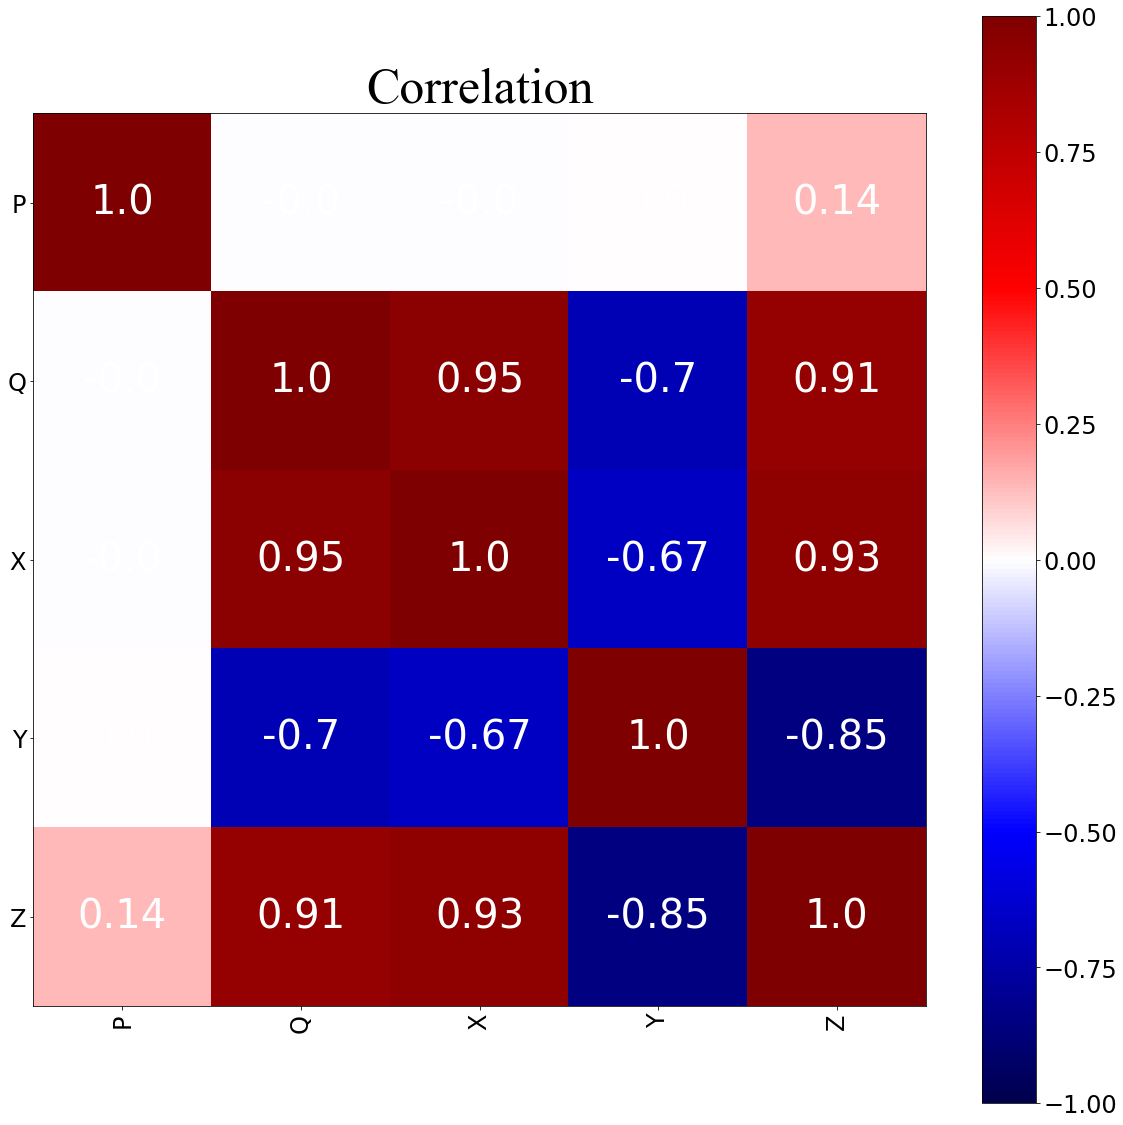

In [10]:
from datlib.plots import *
corr_matrix_heatmap(df.corr(),
                   save_fig = False,
                   pp = None,
                   title = "Correlation")


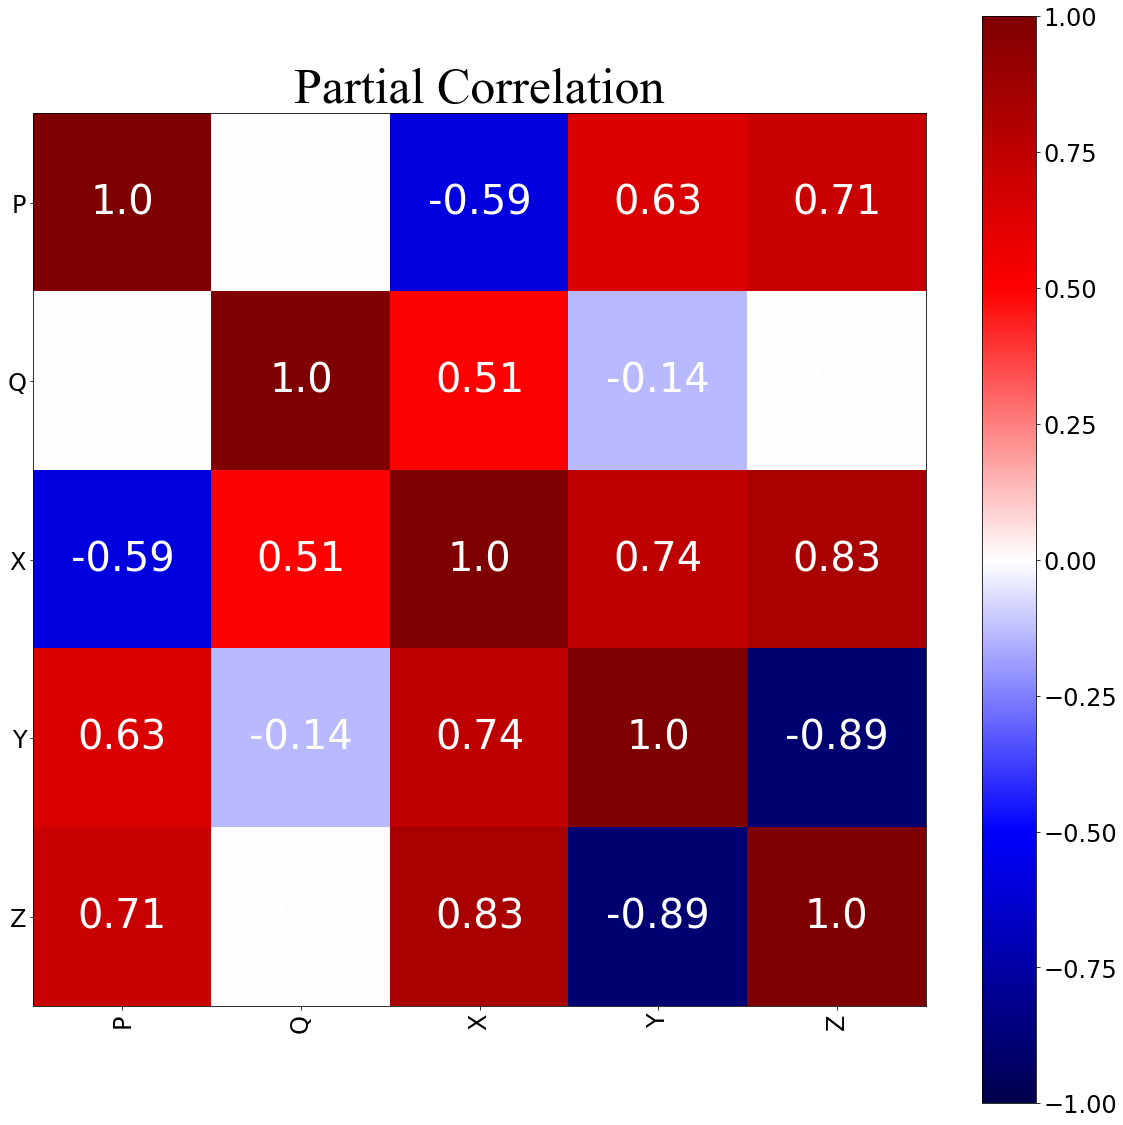

In [11]:
corr_matrix_heatmap(df.pcorr(),
                   save_fig = False,
                   pp = None,
                   title = "Partial Correlation")


In [12]:
pcorr_pvalues = {}

for y, Y in residuals.items():
    pcorr_pvalues[y] = {}
    for x, X in residuals.items():
        if x != y:
            # regress one residual on the other
            #  save the pvalue for the explanatory variable
            #  this is the pvalue of the partial correlation
            results = sm.OLS(Y, X).fit()
            pcorr_pvalues[y][x] = results.pvalues[x]
            print(results.summary())
        else:
            pcorr_pvalues[y][x] = np.NaN
            
pd.DataFrame(pcorr_pvalues).round(2)

                                 OLS Regression Results                                
Dep. Variable:                      P   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                            0.01267
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                       0.910
Time:                        11:52:03   Log-Likelihood:                     -1.9886e+05
No. Observations:              100000   AIC:                                  3.977e+05
Df Residuals:                   99999   BIC:                                  3.977e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Q   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              1949.
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:52:03   Log-Likelihood:                     -1.8199e+05
No. Observations:              100000   AIC:                                  3.640e+05
Df Residuals:                   99999   BIC:                                  3.640e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.402
Model:                            OLS   Adj. R-squared (uncentered):              0.402
Method:                 Least Squares   F-statistic:                          6.720e+04
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:52:03   Log-Likelihood:                     -1.9688e+05
No. Observations:              100000   AIC:                                  3.938e+05
Df Residuals:                   99999   BIC:                                  3.938e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

                                 OLS Regression Results                                
Dep. Variable:                      Z   R-squared (uncentered):                   0.801
Model:                            OLS   Adj. R-squared (uncentered):              0.801
Method:                 Least Squares   F-statistic:                          4.025e+05
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        11:52:04   Log-Likelihood:                     -2.2231e+05
No. Observations:              100000   AIC:                                  4.446e+05
Df Residuals:                   99999   BIC:                                  4.446e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,P,Q,X,Y,Z
P,NaN,0.91,0.0,0.0,0.00
Q,0.91,NaN,0.0,0.0,0.14
X,0.00,0.00,NaN,0.0,0.00
Y,0.00,0.00,0.0,NaN,0.00
Z,0.00,0.14,0.0,0.0,NaN


In [13]:
undirected_graph = {key:[] for key in df.keys()}
for x in undirected_graph:
    undirected_graph[x] = [y for y in df.keys() if y != x]
undirected_graph

{'P': ['Q', 'X', 'Y', 'Z'],
 'Q': ['P', 'X', 'Y', 'Z'],
 'X': ['P', 'Q', 'Y', 'Z'],
 'Y': ['P', 'Q', 'X', 'Z'],
 'Z': ['P', 'Q', 'X', 'Y']}

In [14]:
import copy
p_val = .01
def build_skeleton(df, undirected_graph):
    def check_remaining_controls(control_vars, undirected_graph, x, y, controls_used) :
        c_used = copy.copy(controls_used)
        if y in undirected_graph[x]:
            for c_var in control_vars:
                c_used.append(c_var)
                test = df.partial_corr(x = x, y = y, covar=c_used,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val: 

                    undirected_graph[x].remove(y)
                    #breakout of the for 
                    break
                else:
                    remaining_controls = copy.copy(control_vars)
                    remaining_controls.remove(c_var)
                    print(c_used)

                    # recursive function that iterates through remaining variables 
                    #  uses them as controls statistical significance holds without them,
                    #  otherwise break
                    check_remaining_controls(remaining_controls, undirected_graph, x, y, c_used)

    for x in df.keys():
        ys = undirected_graph[x]
        for y in df.keys():
            if x != y:
                test = df.partial_corr(x=x, 
                                       y=y, 
                                       covar = None,
                                      method = "pearson")
                if test["p-val"].values[0] > p_val:
                    undirected_graph[x].remove(y)
                else:
                    control_vars = [z for z in df.keys() if z != y and z != x]
                    check_remaining_controls(control_vars, undirected_graph, x, y, [])
    return undirected_graph

build_skeleton(df, undirected_graph)

['Q']
['Q', 'X']
['Q', 'X', 'Y']
['Q', 'X', 'Y']
['Q', 'X', 'Y', 'X']
['Q', 'X']
['Q', 'X', 'Q']
['Q', 'X', 'Q', 'Y']
['Q', 'X', 'Q', 'Y']
['Q', 'X', 'Q', 'Y', 'Q']
['Q', 'X', 'Y']
['Q', 'X', 'Y', 'Q']
['Q', 'X', 'Y', 'Q', 'X']
['Q', 'X', 'Y', 'Q', 'X']
['Q', 'X', 'Y', 'Q', 'X', 'Q']
['P']
['P', 'Y']
['P', 'Y', 'Z']
['P', 'Y', 'Z']
['P', 'Y', 'Z', 'Y']
['P', 'Y']
['P', 'Y', 'P']
['P', 'Y', 'P', 'Z']
['P', 'Y', 'P', 'Z']
['P', 'Y', 'P', 'Z', 'P']
['P', 'Y', 'Z']
['P', 'Y', 'Z', 'P']
['P', 'Y', 'Z', 'P', 'Y']
['P', 'Y', 'Z', 'P', 'Y']
['P', 'Y', 'Z', 'P', 'Y', 'P']
['P']
['P', 'X']
['P', 'X', 'Z']
['P', 'X', 'Z']
['P', 'X', 'Z', 'X']
['P', 'X']
['P', 'X', 'P']
['P', 'X', 'P', 'Z']
['P', 'X', 'P', 'Z']
['P', 'X', 'P', 'Z', 'P']
['P', 'X', 'Z']
['P', 'X', 'Z', 'P']
['P', 'X', 'Z', 'P', 'X']
['P', 'X', 'Z', 'P', 'X']
['P', 'X', 'Z', 'P', 'X', 'P']
['P']
['P', 'X']


ValueError: list.remove(x): x not in list

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def graph_DAG(undirected_graph, df, title = "DAG Structure"):
    pcorr_matrix = df.pcorr()
    graph= nx.Graph()
    edges = []
    edge_labels = {}
    for key in undirected_graph:
        for key2 in undirected_graph[key]:
            if (key2, key) not in edges:
                edge = (key, key2)
                edges.append(edge)
                edge_labels[edge] = str(round(pcorr_matrix.loc[key][key2], 2))
    
    print(edges)
    print(edge_labels)
    
    
    graph.add_edges_from(edges)

graph_DAG(undirected_graph, df)